In [1]:
#%%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# %%

def get_total_lines(file_path):
    with open(file_path, 'r') as f:
        return sum(1 for _ in f)

In [3]:
# %%

num_user_interaction = get_total_lines("./data/goodreads_interactions.csv")
print(num_user_interaction)

228648343


In [4]:
# %%

# 1/4th of user interactions
data_split_size = num_user_interaction/4
print(data_split_size)

57162085.75


In [5]:
# %%

# 1/8th of user interactions
data_split_size = num_user_interaction/8
print(data_split_size)

28581042.875


In [17]:
#%%

def read_csv_in_chunks(file_path, chunk_size=500):
    total_lines = get_total_lines(file_path)
    chunk_list = []
    lines_read = 0
    with pd.read_csv(file_path, chunksize=chunk_size) as reader:
        for chunk in tqdm(reader, desc=f"Loading {file_path}", total=total_lines//chunk_size, unit="chunk"):
            chunk_list.append(chunk)
            lines_read += chunk_size
            if lines_read >= total_lines:
                break
    return pd.concat(chunk_list, ignore_index=True)

In [9]:
# %%

# 1/8th of user interactions
interactions_reduced = read_csv_in_chunks("./data/goodreads_interactions.csv")
interactions_reduced.to_csv("./data/interactions.csv")

Loading ./data/goodreads_interactions.csv:  98%|█████████▊| 50/51 [00:00<00:00, 1049.54chunk/s]


In [18]:
# %%

# Read the data
file_path = "./data/interactions.csv"
df = read_csv_in_chunks(file_path, chunk_size=100)

Loading ./data/interactions.csv: 100%|██████████| 255/255 [00:00<00:00, 1473.77chunk/s]


In [19]:
#%%
# Number of unique users
num_unique_users = df['user_id'].nunique()

# Number of unique books
num_unique_books = df['book_id'].nunique()

# Percentage of books read
percent_books_read = df['is_read'].mean() * 100

# Average rating
average_rating = df['rating'].mean()

# Percentage of reviews
percent_reviewed = df['is_reviewed'].mean() * 100

In [20]:
#%%

# Display the results
print(f"Number of unique users: {num_unique_users}")
print(f"Number of unique books: {num_unique_books}")
print(f"Percentage of books read: {percent_books_read:.2f}%")
print(f"Average rating: {average_rating:.2f}")
print(f"Percentage of reviews: {percent_reviewed:.2f}%")

Number of unique users: 43
Number of unique books: 19799
Percentage of books read: 42.16%
Average rating: 1.59
Percentage of reviews: 9.92%


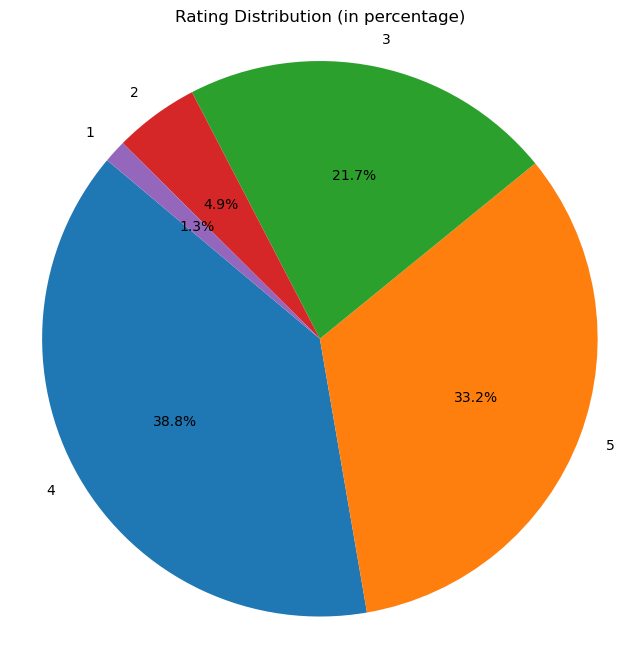

In [21]:
#%%
# Filter the DataFrame
filtered_df = df[(df['is_read'] != 0) & (df['rating'] != 0)]

# Save the new DataFrame to a file
filtered_df.to_csv("./data/filtered_interactions.csv", index=False)

# Calculate rating distribution
rating_distribution = filtered_df['rating'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution (in percentage)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

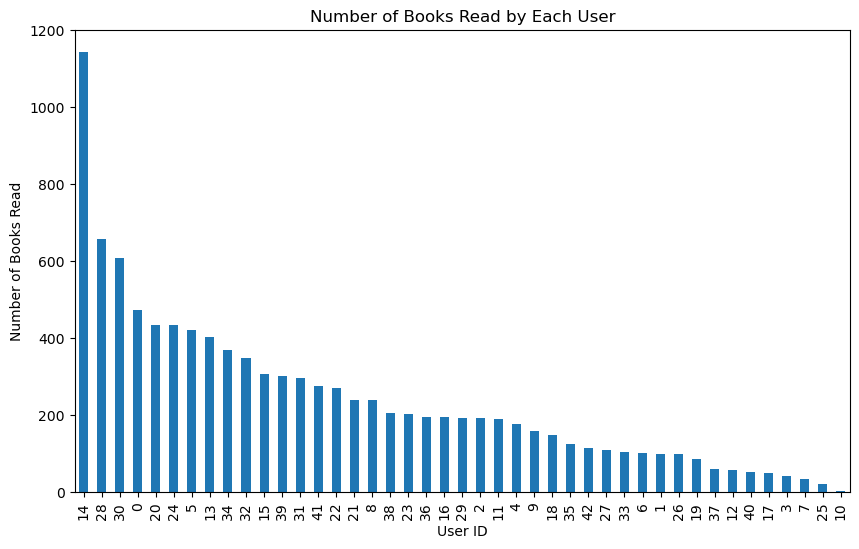

In [22]:
# Number of books read by each user
books_read_by_user = filtered_df['user_id'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
books_read_by_user.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Books Read')
plt.title('Number of Books Read by Each User')
plt.show()

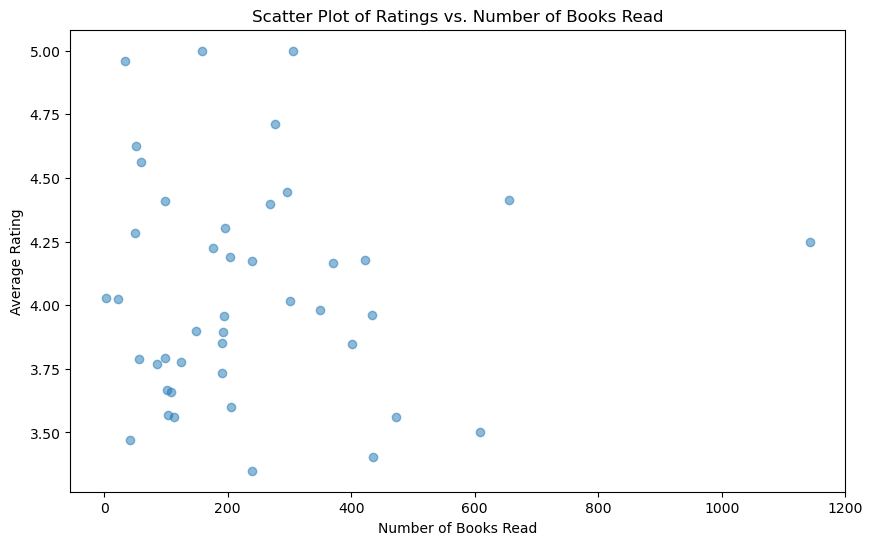

In [23]:
# Calculate the average rating given by each user
average_rating_by_user = filtered_df.groupby('user_id')['rating'].mean()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(books_read_by_user, average_rating_by_user, alpha=0.5)
plt.xlabel('Number of Books Read')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Ratings vs. Number of Books Read')
plt.show()

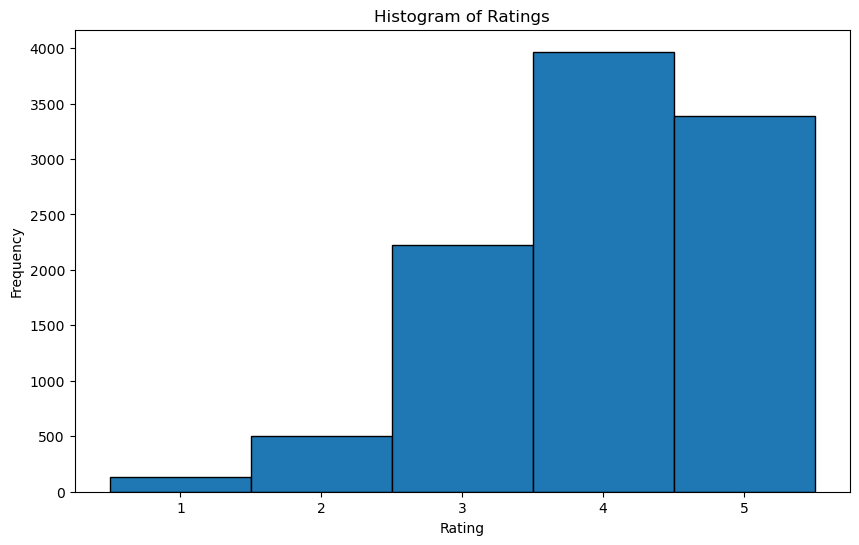

In [24]:
# Plotting the histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['rating'], bins=range(1, 7), edgecolor='black', align='left')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.xticks(range(1, 6))
plt.show()

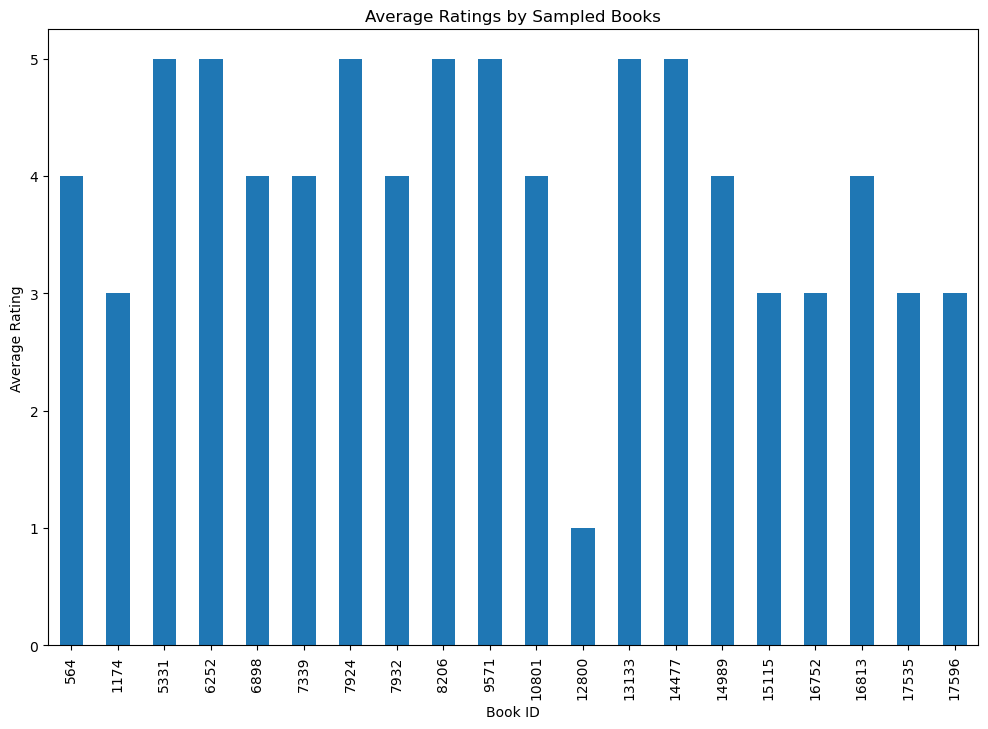

In [25]:
# Select a random sample of book IDs
sampled_books = filtered_df['book_id'].drop_duplicates().sample(n=20, random_state=1)

# Calculate the average rating for the sampled books
average_rating_by_sampled_books = filtered_df[filtered_df['book_id'].isin(sampled_books)].groupby('book_id')['rating'].mean()

# Plotting the bar chart of average ratings for the sampled books
plt.figure(figsize=(12, 8))
average_rating_by_sampled_books.plot(kind='bar')
plt.xlabel('Book ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Sampled Books')
plt.show()

In [26]:
# Calculate the number of books read by each user
books_read_by_user = filtered_df['user_id'].value_counts()

# Calculate the average number of books read by users
average_books_read = books_read_by_user.mean()

print(average_books_read)

237.62790697674419


In [27]:
# User who has read the least number of books
least_books_user = books_read_by_user.idxmin()
least_books_count = books_read_by_user.min()

# User who has read the highest number of books
most_books_user = books_read_by_user.idxmax()
most_books_count = books_read_by_user.max()

print(f"User who has read the least number of books (User ID: {least_books_user}) has read {least_books_count} books.")
print(f"User who has read the highest number of books (User ID: {most_books_user}) has read {most_books_count} books.")

User who has read the least number of books (User ID: 10) has read 2 books.
User who has read the highest number of books (User ID: 14) has read 1143 books.
